In [2]:
# 1/24/24 Greenberger-Horne-Zeilinger (GHZ) State 23 qubits
# importing all required libraries
import supermarq
import qiskit
import qiskit_superstaq as qss
from qiskit.visualization import plot_histogram
import os
import json

In [3]:
# connecting api key from my account to simulate the circuits
api_key = "1446224e1fed6a2d1408bf1e90180891c56dd33698d1d23e54f25044487108c2"
provider = qss.SuperstaqProvider(api_key)
print(provider.get_balance())


1.40 credits


In [4]:
# defining which circuit I want to use and how many qubits
qc = supermarq.ghz.GHZ(num_qubits=15)
qc_circuit = qc.qiskit_circuit()

# setting the simulator that we will use to simulate our circuit (the default is ss_unconstrained_simulator)
backend = provider.get_backend("ibmq_statevector_simulator")
job_qss = backend.run(qc_circuit, shots=1000, method="dry-run")

{'000000000000000': 494, '111111111111111': 506}
0.9999639987039067


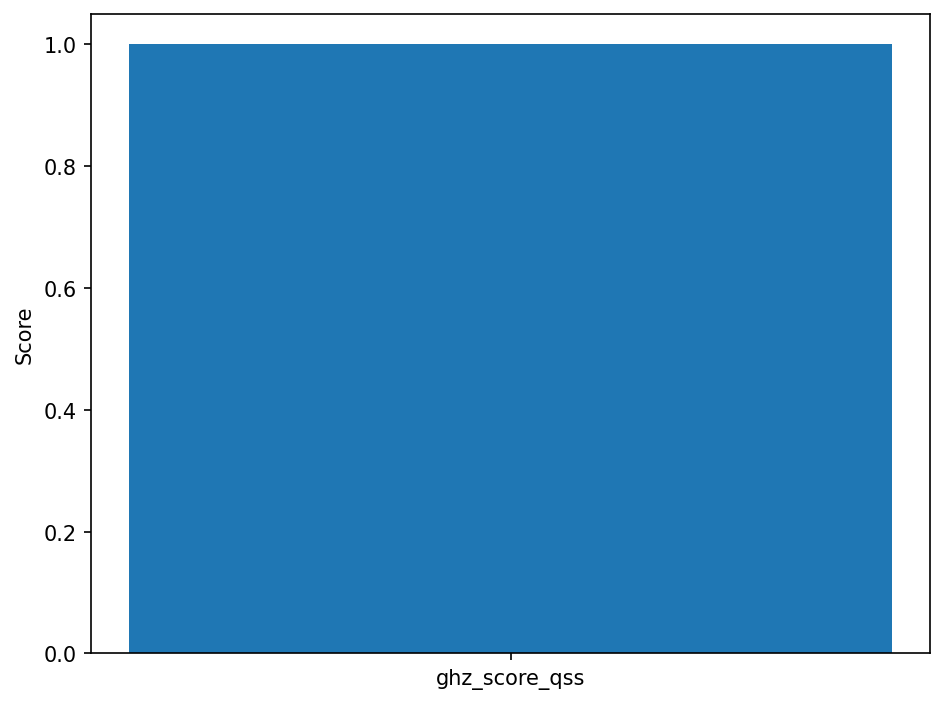

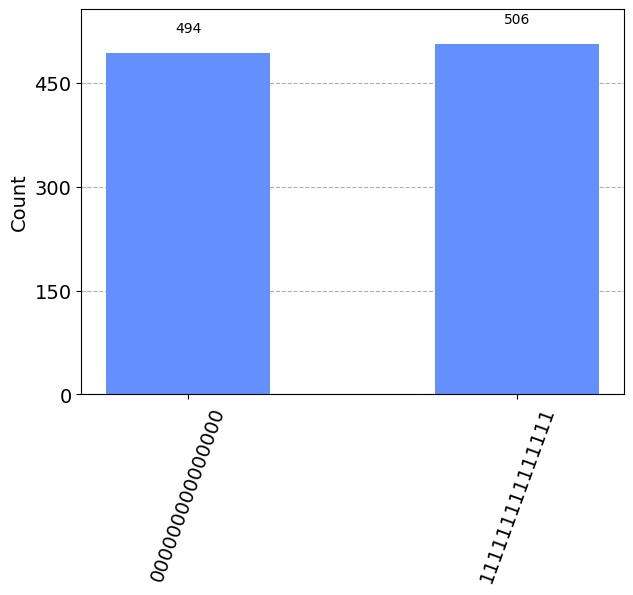

In [5]:
# gettng the results of the simulationg 
job = job_qss.result()

# getting the counts and printing them
counts = job.get_counts()
print(counts)

# measuring and getting fidelity of the result 
score = qc.score(counts)
print(score)

# logging results into a json file
with open('ghz_counts.json', 'w', encoding='utf-8') as f:
    json.dump(counts, f, ensure_ascii=False, indent=4)

# histogram of the score
supermarq.plotting.plot_results([score], ["ghz_score_qss"])

# histogram of the counts
plot_histogram(counts)